# Introduction

Doing analysis and forecasting on my own Instagram data downloaded from the app

Settings -> Security -> Download Data

You will get a JSON file titled 'likes.json'

Convert to CSV for easy data processing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [4]:
df = pd.read_csv('../dataset/likes.csv')

# Counting Likes Per Account

Text(3.6750000000000114, 0.5, 'Likes Given')

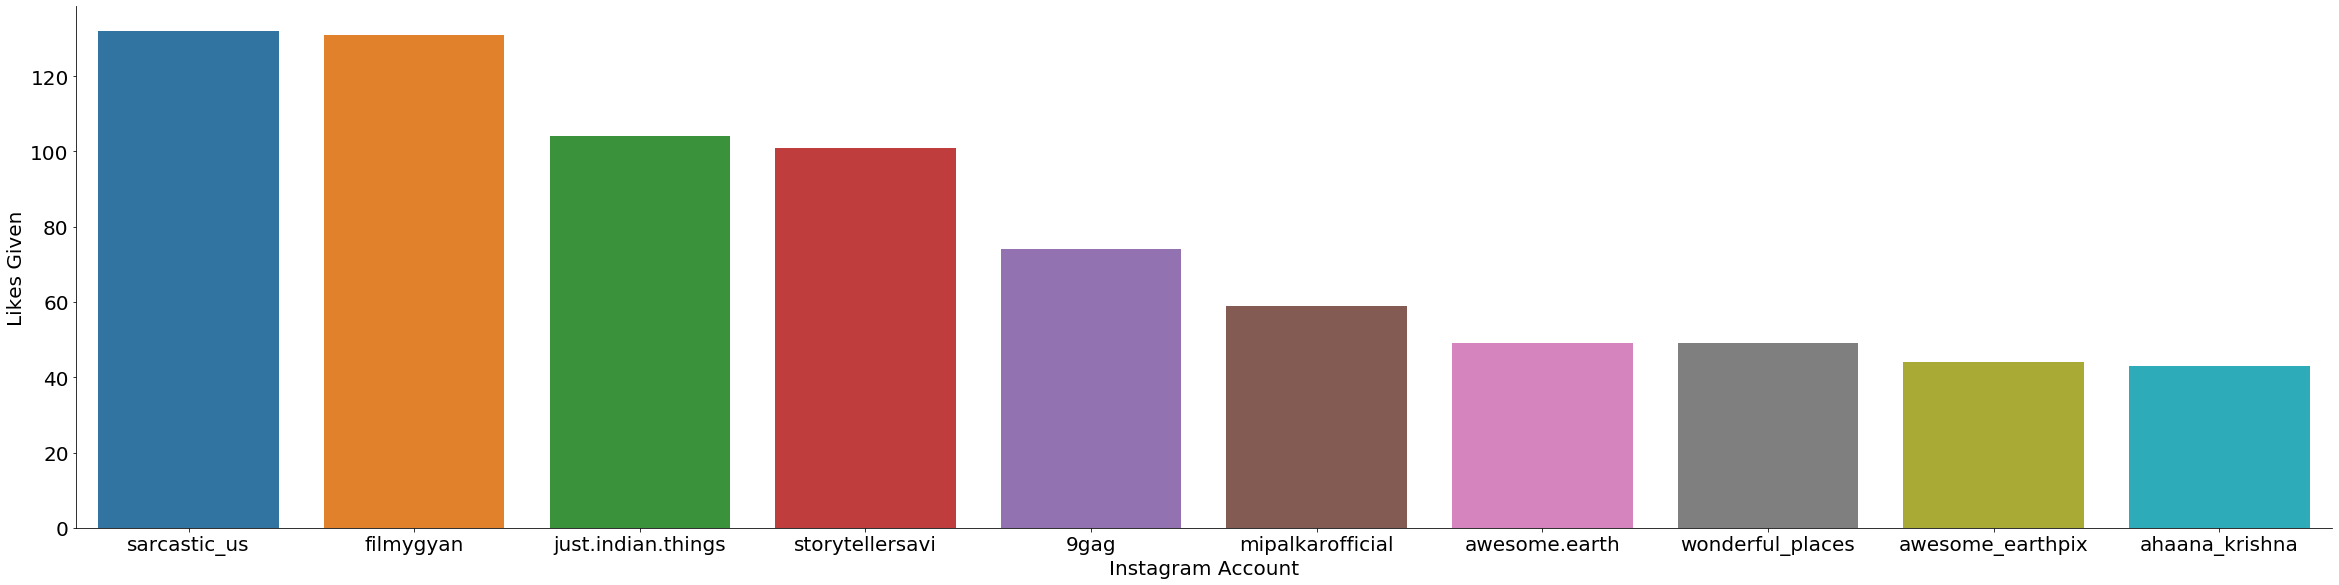

In [5]:
#counting each time I give an account a like
order_data = df['media_likes/1'].value_counts().iloc[:10].index
sns.catplot(x='media_likes/1',
           kind='count',
            height=8, 
            aspect=4,
           data=df, order = order_data)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Instagram Account', size = 20)
plt.ylabel('Likes Given', size = 20)

# Counting Likes Per Day


In [6]:
#dropping which account I liked, and comment likes
df = df.drop(['comment_likes/0','media_likes/1','comment_likes/1'], axis=1)

In [7]:
#Assigning one like instance to each date
df['Likes'] = 1
df.columns = ['Date','Likes']
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)
df.head()

,Likes
Date,
2020-06-09 05:10:31+00:00,1
2020-06-08 13:35:29+00:00,1
2020-06-08 13:30:26+00:00,1
2020-06-08 13:29:59+00:00,1
2020-06-07 11:53:10+00:00,1


# Data Processing for FB Prophet

The library requires a dataframe with two columns (ds and y)

ds column must be in DateTime format

In [8]:
#summing up every like that happens in a given 24 hour period
likes_df = df.resample('D').size().reset_index()
df = pd.DataFrame(likes_df)
df.columns = ['ds','y']
df.head()

,ds,y
0,2016-10-12 00:00:00+00:00,10
1,2016-10-13 00:00:00+00:00,14
2,2016-10-14 00:00:00+00:00,11
3,2016-10-15 00:00:00+00:00,0
4,2016-10-16 00:00:00+00:00,1


In [11]:
df['ds'] = df['ds'].dt.tz_convert(None)
p = Prophet(yearly_seasonality=True,changepoint_prior_scale=0.9)
p.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = p.make_future_dataframe(periods = 365, include_history = True)
forecast = p.predict(future)

# Trends
With weekly and yearly seasonality enabled

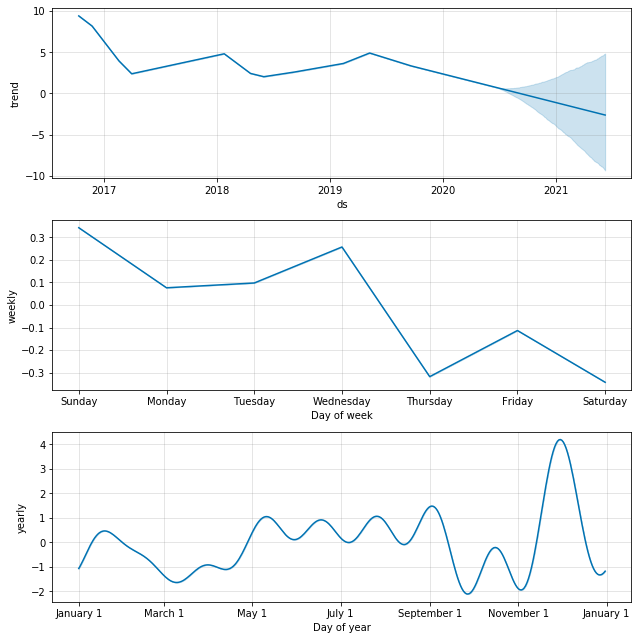

In [13]:
figure2 = p.plot_components(forecast)

# Forecasting
Predicting the trend of my Instgram usage into 2021

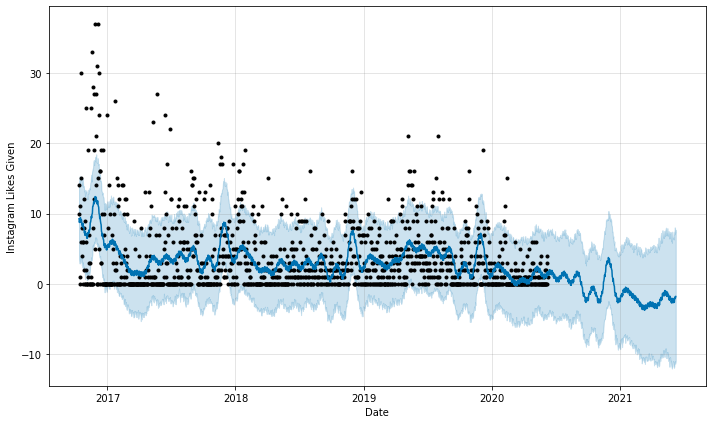

In [14]:
figure = p.plot(forecast, xlabel='Date', ylabel='Instagram Likes Given')